# Trabajo Práctico N◦ 2: Matrices Insumo-Producto.

In [1]:
from funciones import potenciaDeMatriz, siguientePotencia, metodoPotencia
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Consigna 1

In [2]:
# Probar...

## Consigna 2

In [3]:
# Definimos las matrices
A1 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],[0.24, 0.073, 0.219, 0.013, 0.327],[0.098, 0.12, 0.311, 0.302, 0.208],[0.173, 0.03, 0.133, 0.14, 0.074],[0.303, 0.256, 0.323, 0.225, 0.257]])
A2 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],[0.24, 0.073, 0.219, 0.013, 0.327],[0.098, 0.12, 0.311, 0.302, 0.208],[0.173, 0.03, 0.133, 0.14, 0.074],[0.003, 0.256, 0.323, 0.225, 0.257]])

#Definimos los vectores

#Vector base de largo 250
a1 = np.zeros(250) 
a2 = np.zeros(250)
#Definimos el primer elemento de cada uno
a1[0] = np.linalg.norm(A1)
a2[0] = np.linalg.norm(A2)
#Definimos recursivamente los siguientes 249 elementos
A1_n = A1
A2_n = A2
for n in range(1, 250):
    A1_n = siguientePotencia(A1_n, A1)
    A2_n = siguientePotencia(A2_n, A2)
    a1[n] = np.linalg.norm(A1_n, 2)
    a2[n] = np.linalg.norm(A2_n, 2)

print("A1\n", A1)
print("\nPrimeros 10 valores de a1:\n",a1[0:10])

print("\nA2\n", A2)
print("\nPrimeros 30 valores de a2:\n",a2[0:30])
 

A1
 [[0.186 0.521 0.014 0.32  0.134]
 [0.24  0.073 0.219 0.013 0.327]
 [0.098 0.12  0.311 0.302 0.208]
 [0.173 0.03  0.133 0.14  0.074]
 [0.303 0.256 0.323 0.225 0.257]]

Primeros 10 valores de a1:
 [1.1626315  1.03547727 1.03759792 1.03723717 1.03735967 1.03732524
 1.03733386 1.03733118 1.03733185 1.03733165]

A2
 [[0.186 0.521 0.014 0.32  0.134]
 [0.24  0.073 0.219 0.013 0.327]
 [0.098 0.12  0.311 0.302 0.208]
 [0.173 0.03  0.133 0.14  0.074]
 [0.003 0.256 0.323 0.225 0.257]]

Primeros 30 valores de a2:
 [1.12245802 0.89646753 0.83830612 0.77619525 0.72072113 0.66833534
 0.62006012 0.57516754 0.53356526 0.49495861 0.45915044 0.42593108
 0.39511576 0.36652964 0.34001178 0.31541241 0.29259278 0.27142411
 0.25178697 0.23357055 0.21667206 0.20099615 0.18645437 0.17296466
 0.16045092 0.14884253 0.13807399 0.12808453 0.1188178  0.11022151]


## Consigna 3

In [4]:
A1_aval, A1_std = metodoPotencia(A1)
A2_aval, A2_std = metodoPotencia(A2)

print("Aproximación del autovalor máximo de A1:", A1_aval,"\nDesviación estandar del autovalor de A1:", A1_std)

print("\nAproximación del autovalor máximo de A2:", A2_aval,"\nDesviación estandar del autovalor de A2:", A2_std)

Aproximación del autovalor máximo de A1: 1.0 
Desviación estandar del autovalor de A1: 0.0

Aproximación del autovalor máximo de A2: 0.9276514472123604 
Desviación estandar del autovalor de A2: 1.4509557335799652e-16


## Consigna 4

### A) 

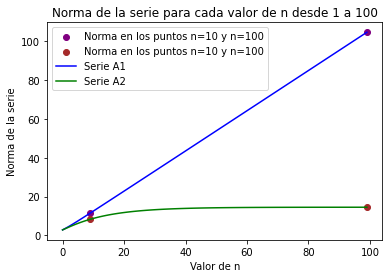

In [5]:
#Definimos arrays base donde guardar los resultados de las series de potencia para cada matriz
normas_serieA1 = np.zeros(100)
normas_serieA2 = np.zeros(100)

#Calculamos las series y sus normas
I1 = np.identity(A1.shape[0])
I2 = np.identity(A2.shape[0])
##Definimos la primera posiciòn
serieA1 = I1 + A1
A1_n = A1
normas_serieA1[0] = np.linalg.norm(serieA1)
serieA2 = I2 + A2
A2_n = A2
normas_serieA2[0] = np.linalg.norm(serieA2)
##Definimos el resto recursivamente
for i in range(1, 100):
    A1_n = siguientePotencia(A1_n, A1)
    serieA1 = serieA1 + A1_n
    normas_serieA1[i] = np.linalg.norm(serieA1)

    A2_n = siguientePotencia(A2_n, A2)
    serieA2 = serieA2 + A2_n
    normas_serieA2[i] = np.linalg.norm(serieA2)

#Graficamos

fig, ax = plt.subplots()
#Dos puntos de A1 pedidos
ax.scatter(9, normas_serieA1[9], color='purple', label='Norma en los puntos n=10 y n=100')
ax.scatter(99, normas_serieA1[99], color='purple')
#Dos puntos de A2 pedidos
ax.scatter(9, normas_serieA2[9], color='brown', label='Norma en los puntos n=10 y n=100')
ax.scatter(99, normas_serieA2[99], color='brown')
#Plot con todos los puntos para mayor claridad
ax.plot(np.arange(100), normas_serieA1, label="Serie A1", color='blue')
ax.plot(np.arange(100), normas_serieA2, label="Serie A2", color='green')

ax.set(xlabel="Valor de n", ylabel="Norma de la serie", title= 'Norma de la serie para cada valor de n desde 1 a 100' )
ax.legend()
plt.show()

    

### B) ###CAPAZ DESARROLLAR CON MAS GANAS###

Como podemos observar en el gráfico, la serie asociada a la matriz A2 converge normalmente pues tiende a una funciòn constante, a diferencia de la norma de la serie asociada a la matriz A1 la cual se observa como una recta de pendiente positiva, que diverge al infinito positivo. 


### C) COMPLETAR

### D) COMPLETAR 

## Consigna 5

In [7]:
path = "matrizlatina2011_compressed_0.xlsx"
dataset = pd.read_excel(path, sheet_name=1)

#Definimos las matrices de nuestros dos paises
COL = dataset[dataset["Country_iso3"] =="COL"]
BOL = dataset[dataset["Country_iso3"] =="BOL"]